In [2]:
%cd "D:\桌面文件\大数据管理"

D:\桌面文件\大数据管理


In [3]:
%pwd

'D:\\桌面文件\\大数据管理'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
plt.rcParams['font.sans-serif']= 'SimHei'

# 一、加载数据
## 1. 看一下数据集的大小，有多少条数据。2. 观察一下有哪些变量。

In [9]:
data1 = pd.read_excel('饭店销售数据.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('饭店销售数据.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('饭店销售数据.xlsx',sheet_name='meal_order_detail3')

In [10]:
# 将三个表上下连接
data = pd.concat([data1,data2,data3],axis=0)

In [11]:
data.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [13]:
data.shape

(10037, 19)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          10037 non-null  int64         
 1   order_id           10037 non-null  int64         
 2   dishes_id          10037 non-null  int64         
 3   logicprn_name      0 non-null      float64       
 4   parent_class_name  0 non-null      float64       
 5   dishes_name        10037 non-null  object        
 6   itemis_add         10037 non-null  int64         
 7   counts             10037 non-null  int64         
 8   amounts            10037 non-null  int64         
 9   cost               0 non-null      float64       
 10  place_order_time   10037 non-null  datetime64[ns]
 11  discount_amt       0 non-null      float64       
 12  discount_reason    0 non-null      float64       
 13  kick_back          0 non-null      float64       
 14  add_inprice 

# 二、数据预处理
## 1 删除空值，和没有分析价值的列；2 

In [15]:
# 本数据集中没有空值只有没有值的变量的列
data.drop_duplicates()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,NaN,NaN,爆炒双丝,0,1,35,NaN,2016-08-31 21:53:30,NaN,NaN,NaN,0,NaN,NaN,caipu/301003.jpg,1089
3607,5686,672,609959,NaN,NaN,小炒羊腰\n\n\n,0,1,36,NaN,2016-08-31 21:54:40,NaN,NaN,NaN,0,NaN,NaN,caipu/202005.jpg,1089
3608,5379,647,610012,NaN,NaN,香菇鹌鹑蛋,0,1,39,NaN,2016-08-31 21:54:44,NaN,NaN,NaN,0,NaN,NaN,caipu/302001.jpg,1094
3609,5380,647,610054,NaN,NaN,不加一滴油的酸奶蛋糕,0,1,7,NaN,2016-08-31 21:55:24,NaN,NaN,NaN,0,NaN,NaN,caipu/501003.jpg,1094


In [16]:
data.drop(['logicprn_name','parent_class_name','cost','discount_amt','discount_reason','kick_back','add_info','bar_code'],
          inplace=True,
          axis=1)
# data.dropna(axis=1) 更方便

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


# 三、数据可视化
1 想知道销售量最好的前10个菜品以及最不好的10个菜品；   
2 这个点8月的总销售额，上下旬分别的销售额，每周的销售额可以画一个随时间变化的销售量趋势图；  
3 想知道每一天什么时候的人流量最多；   
4 销售额最好和最差的前10个菜品；  

In [28]:
# 消除菜名列的\n符号
data['dishes_name'] = data['dishes_name'].str.replace('\n','',regex=False)

In [29]:
# 不同菜品被点的次数
sales = data['dishes_name'].value_counts()

In [32]:
sales

dishes_name
白饭/大碗         323
凉拌菠菜          269
谷稻小庄          239
麻辣小龙虾         216
辣炒鱿鱼          189
             ... 
特醇嘉士伯啤酒罐装      13
鸡蛋、肉末肠粉        12
三丝鳝鱼           10
百里香奶油烤紅酒牛肉      5
铁板牛肉            3
Name: count, Length: 145, dtype: int64

In [30]:
# 销量最好的10个菜品
sales[0:11]

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
水煮鱼          162
Name: count, dtype: int64

In [41]:
# 销量最差的10个菜品
sales[-11:-1]

dishes_name
凉拌海带豆芽紫菜          18
牛奶卷               18
冰镇花螺              17
宝宝版牛肉肠粉           17
长城窖酿解百纳红酒干红葡萄酒    17
 42度海之蓝           17
特醇嘉士伯啤酒罐装         13
鸡蛋、肉末肠粉           12
三丝鳝鱼              10
百里香奶油烤紅酒牛肉         5
Name: count, dtype: int64

In [45]:
# 添加一列每个菜品的销售额
data['money'] = data['counts']*data['amounts']

In [52]:
# 菜品销售额排名
dishes_money = data.groupby('dishes_name')['money'].sum()

In [56]:
dishes_money_rank = dishes_money.sort_values(ascending=False)

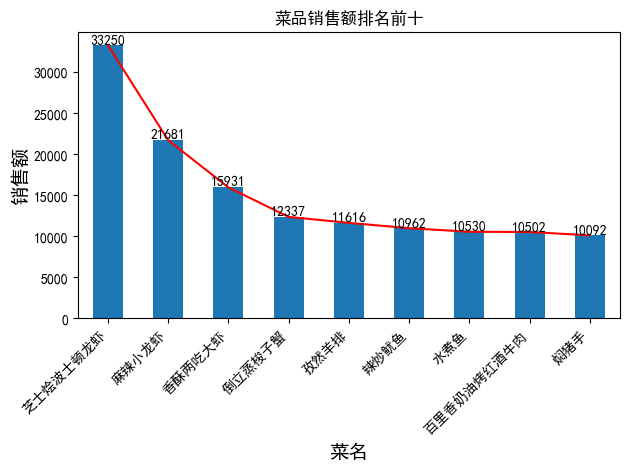

In [93]:
# 销售额排名前10的菜品
ax= dishes_money_rank[0:9].plot(kind='bar')
dishes_money_rank[0:9].plot(kind='line',color= ['r']) # 加上折线设置颜色为红色
plt.title('菜品销售额排名前十')
plt.xlabel('菜名',fontsize=14)
plt.ylabel('销售额',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,label_type='edge')

plt.xticks(rotation=45, ha='right') # 旋转x轴标签，并右对齐
plt.tight_layout() # 确保图表布局紧凑，不会有元素被裁剪


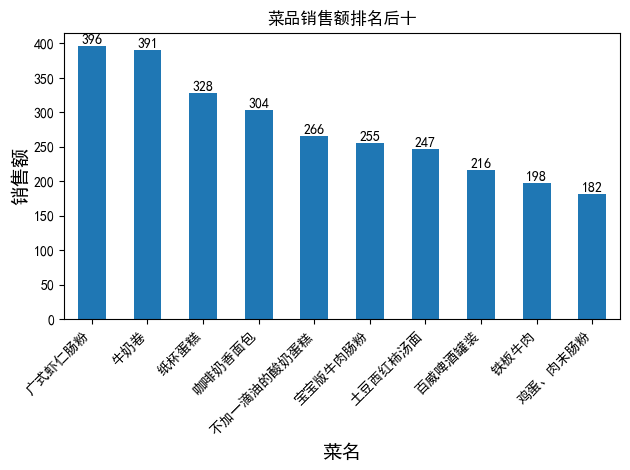

In [91]:
ax= dishes_money_rank[-11:-1].plot(kind='bar')
plt.title('菜品销售额排名后十')
plt.xlabel('菜名',fontsize=14)
plt.ylabel('销售额',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,label_type='edge')
plt.xticks(rotation=45, ha='right') # 旋转x轴标签，并右对齐
plt.tight_layout() # 确保图表布局紧凑，不会有元素被裁剪

In [60]:
# 销售额排名倒数10名
dishes_money_rank[-11:-1]

dishes_name
广式虾仁肠粉        396
牛奶卷           391
纸杯蛋糕          328
咖啡奶香面包        304
不加一滴油的酸奶蛋糕    266
宝宝版牛肉肠粉       255
土豆西红柿汤面       247
百威啤酒罐装        216
铁板牛肉          198
鸡蛋、肉末肠粉       182
Name: money, dtype: int64

In [96]:
data['time'] = pd.to_datetime(data['place_order_time'])

In [99]:
data['day'] = data['time'].map(lambda x : x.day)

In [100]:
data

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,money,time,day
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49,2016-08-01 11:05:36,1
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48,2016-08-01 11:07:07,1
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30,2016-08-01 11:07:40,1
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25,2016-08-01 11:11:11,1
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13,2016-08-01 11:11:30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,35,2016-08-31 21:53:30,31
3607,5686,672,609959,小炒羊腰,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,36,2016-08-31 21:54:40,31
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,39,2016-08-31 21:54:44,31
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,7,2016-08-31 21:55:24,31


In [118]:
each_day = data.groupby('day')['money'].sum()
each_day.sort_values()[0:5]
ax= each_day.plot(kind='bar')
each_day.plot(kind='line',color= ['r'])
plt.title('8月销售额统计')
plt.xlabel('日期',fontsize=14)
plt.ylabel('销售额',fontsize=14)
for i in ax.containers:
    ax.bar_label(i,label_type='edge',fontsize=6)
plt.xticks(rotation=45, ha='right') # 旋转x轴标签，并右对齐
plt.tight_layout() # 确保图表布局紧凑，不会有元素被裁剪

day
16    4447
24    6231
2     6260
8     6579
29    6792
Name: money, dtype: int64